In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [6]:
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras.layers import Concatenate
from keras import Input
from keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],border_mode='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(input=inp, output=out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 5, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 7, activation="relu", input_shape=(100, 100,..., strides=1, padding="same")`
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)       

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)


Train on 551 samples, validate on 62 samples
Epoch 1/20
551/551 [==============================] - 178s 324ms/step - loss: 0.5894 - accuracy: 0.7786 - val_loss: 0.5347 - val_accuracy: 0.7742
Epoch 2/20
551/551 [==============================] - 166s 301ms/step - loss: 0.5389 - accuracy: 0.7858 - val_loss: 0.5378 - val_accuracy: 0.7742
Epoch 3/20
551/551 [==============================] - 167s 302ms/step - loss: 0.5324 - accuracy: 0.7913 - val_loss: 0.5434 - val_accuracy: 0.7742
Epoch 4/20
551/551 [==============================] - 166s 301ms/step - loss: 0.5364 - accuracy: 0.7931 - val_loss: 0.5364 - val_accuracy: 0.7742
Epoch 5/20
551/551 [==============================] - 163s 295ms/step - loss: 0.5511 - accuracy: 0.7895 - val_loss: 0.5486 - val_accuracy: 0.7742
Epoch 6/20
551/551 [==============================] - 162s 294ms/step - loss: 0.5393 - accuracy: 0.7913 - val_loss: 0.5371 - val_accuracy: 0.7742
Epoch 7/20
551/551 [==============================] - 162s 294ms/step - loss: 

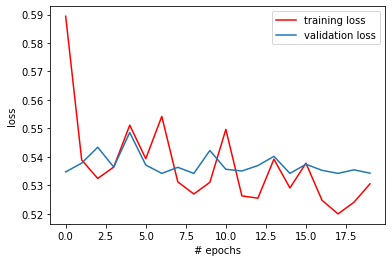

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

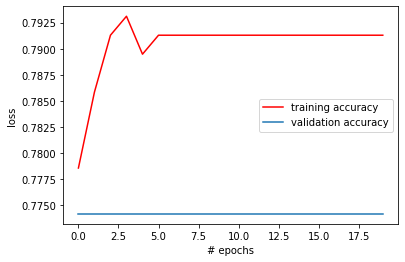

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

69/69 [==============================] - 6s 84ms/step
[0.5241592163624971, 0.782608687877655]
